""

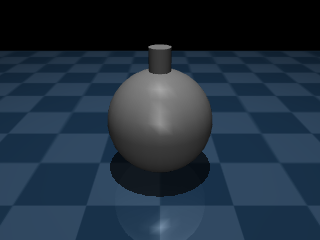

In [1]:
import mujoco
mujoco.MjModel.from_xml_string('<mujoco/>')

#@title Import packages for plotting and creating graphics
import time
import itertools
import numpy as np
from typing import Callable, NamedTuple, Optional, Union, List

# Graphics and plotting.
# print('Installing mediapy:')
# !command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
# !pip install -q mediapy
import mediapy as media
import matplotlib.pyplot as plt

tippe_top = """
<mujoco model="tippe top">
  <option integrator="RK4"/>

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300"/>
    <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid"/>
    <light pos="0 0 .6"/>
    <camera name="closeup" pos="0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="top" pos="0 0 .02">
      <freejoint/>
      <geom name="ball" type="sphere" size=".02" />
      <geom name="stem" type="cylinder" pos="0 0 .02" size="0.004 .008"/>
      <geom name="ballast" type="box" size=".023 .023 0.005"  pos="0 0 -.015"
       contype="0" conaffinity="0" group="3"/>
    </body>
  </worldbody>

  <keyframe>
    <key name="spinning" qpos="0 0 0.02 1 0 0 0" qvel="0 0 0 0 1 200" />
  </keyframe>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(tippe_top)
renderer = mujoco.Renderer(model)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, camera="closeup")
media.show_image(renderer.render())

In [2]:
duration = 7    # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetDataKeyframe(model, data, 0)  # Reset the state to keyframe 0
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, "closeup")
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=framerate)

In [1]:
import gymnasium as gym

env = gym.make("FetchReach-v2")
env.reset()
obs, reward, terminated, truncated, info = env.step(env.action_space.sample())

# The following always has to hold:
assert reward == env.compute_reward(obs["achieved_goal"], obs["desired_goal"], info)
assert truncated == env.compute_truncated(obs["achieved_goal"], obs["desired_goal"], info)
assert terminated == env.compute_terminated(obs["achieved_goal"], obs["desired_goal"], info)

# However goals can also be substituted:
substitute_goal = obs["achieved_goal"].copy()
substitute_reward = env.compute_reward(obs["achieved_goal"], substitute_goal, info)
substitute_terminated = env.compute_terminated(obs["achieved_goal"], substitute_goal, info)
substitute_truncated = env.compute_truncated(obs["achieved_goal"], substitute_goal, info)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/Cython/Distutils/old_build_ext.py:14: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group
/opt/homebrew/anaconda3/lib/python3.11/site-packages/Cython/Distutils/old_build_ext.py:14: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group


RuntimeError: Could not find supported GCC executable.

HINT: On OS X, install GCC 9.x with `brew install gcc@9`. or `port install gcc9`.

In [1]:
%load_ext jupyter_ai

In [2]:
%%ai chatgpt
Please generate a simulation of the 3-body problem
Plot the visualization with mediapy video

OSError: Authentication environment variable OPENAI_API_KEY not provided.
An authentication token is required to use models from the OpenAI provider.
Please specify it via `%env OPENAI_API_KEY=token`. 